# Applied Statistics 8651 2025/2026 Module Assignment
## Author: Ebelechukwu Igwagu
### G00439334@atu.ie

This notebook contains my solution to a collection of assignments for the applied statistics module.

In [2674]:

# Import Dependencies
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Data manipulation and analysis.
# https://pandas.pydata.org/docs/reference/index.html
import pandas as pd

# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random


# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistical functions
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical modeling
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm

# Statistical data visualization
# https://seaborn.pydata.org/
import seaborn as sns

# Tukey's HSD test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
from scipy.stats import tukey_hsd


## **Problem 1 Lady Testing Tea**

Problem 1: Extending the Lady Tasting Tea
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### **Overview of the Lady Testing Tea**


How do you like your cup of tea: milk in first, tea in first, or maybe it doesn’t matter? Have you ever wondered how this preference could be investigated and simulated statistically? 

This assignment presents a simulation and walkthrough of an expanded version of Fisher's Lady Testing Tea experiment using twelve cups of tea, four prepared with milk poured first and the remaining eight with tea poured first. The results are compared with Fisher's original eight cup experiment using statistical testing techniques like probability and hypothesis testing.


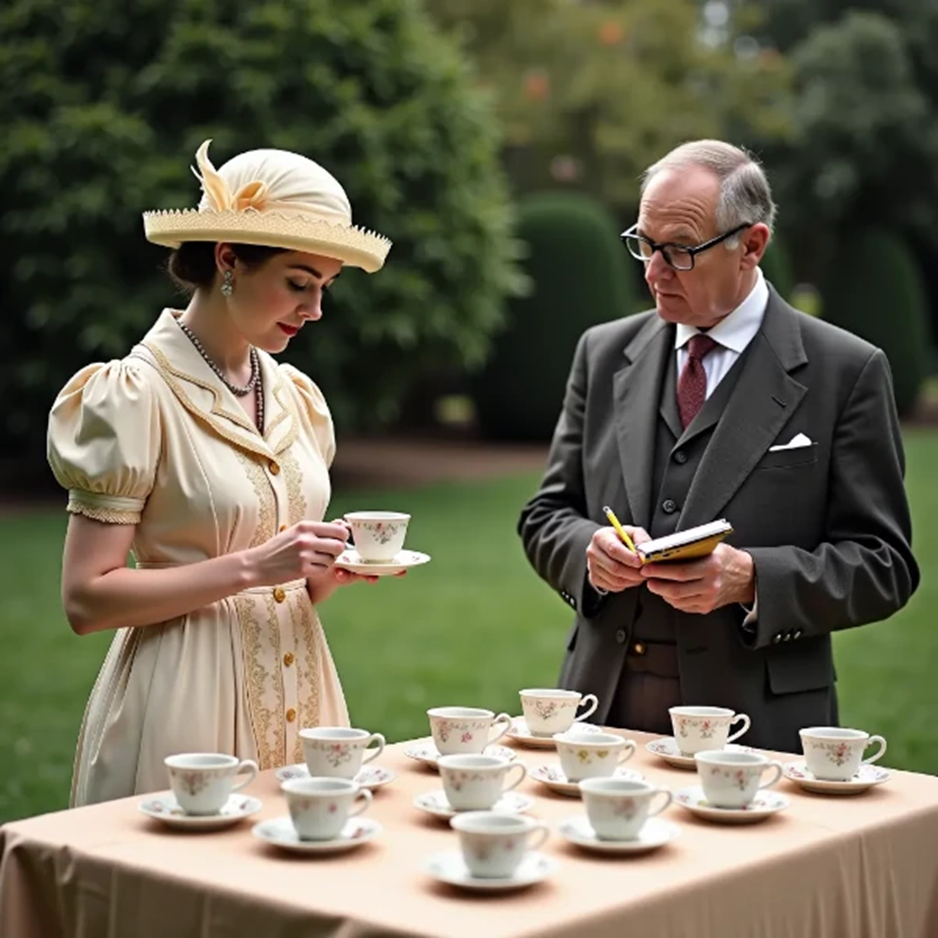



Image source: [Jyna](https://jyyna.dk/wp-content/uploads/2024/08/lady-tasting-tea-experiment.webp)



The Lady testing tea experiment is a century old statistical experiment (1920s) introduced by Ronald A. Fisher. It originated from an informal discussion between Fisher and a phycologist named Muriel Bristol, who declined a cup of tea from Fisher because he poured in the tea first. She claimed she could tell whether a cup of tea had been prepared by pouring the milk first or the tea first. Fisher was skeptical and questioned whether her ability was genuine or simply due to chance.

To validate the claim, Fisher designed an experiment using eight cups of tea. Four cups were prepared by pouring the milk first followed by the tea, while the other four were prepared by pouring the tea first followed by the milk. The cups were presented to Muriel in a random order. she was asked to taste the tea and identify which cups had milk poured first which is how the experiment got its name. The tale had it that the lady tasting tea (Muriel Bristol) was able to identify correctly all four cups that had milk poured in first. This tale was as seen on [Kaggle](https://www.kdnuggets.com/2019/05/lady-tasting-tea-science.html).  

Fisher used this outcome to illustrate the idea of hypothesis testing, showing how probability can be used to assess whether an observed result is likely to have occurred by chance.


### **Hypothesis**

This simulation aims to evaluate whether the null hypothesis should be accepted or rejected based on the probability of correctly identifying milk-first cups by chance.

- **Null Hypothesis (H₀)**:
The Lady tasting tea cannot differentiate between cups prepared with milk poured in first from those with tea poured in first, as she was guessing randomly.

- **Alternative Hypothesis (H₁)**:
The Lady tasting tea can distinguish between cups prepared with milk poured in first from those with tea poured in first.

#### **12 Cup Experiment (4 milk-first, 8 tea-first)**
The simulation starts off with four cups with milk in first and eight cups with tea in first making it up to a total of twelve cups of tea. 

In [2675]:
# Total Number of cups of tea
total_12_cups = 12

# Number of cups of tea with tea in first
tea_in_first_12_cups = 8

# Number of cups of tea with milk in first
milk_in_first_12_cups = 4

Next is to calculate the total number of ways of selecting four cups from twelve when ordered. If an individual is presented with twelve cups to choose from without replacement: there are twelve choices for the first cup, eleven for the second, ten for the third, and nine for the fourth. Multiplying these individual choices together gives the permutations. Permutation is the arrangements of objects in a specific order [(Sakshi)](https://www.analyticsvidhya.com/blog/2024/01/getting-started-with-permutation-and-combination-in-python/). However, for the Lady Tasting Tea experiment, the order of selection does not matter and is only used as an intermediate step in calculating the combinations.

In [2676]:
# Total number of ways to choose 4 cups from 12
# Permutation
ways_to_choose_4cups = 12 * 11 * 10 * 9

# Print
print("The total number of ways to choose 4 cups from 12 is:", ways_to_choose_4cups)

The total number of ways to choose 4 cups from 12 is: 11880


In [2677]:
# The math permutation function can also be used to calculate this
# https://docs.python.org/3/library/math.html#math.perm
total_permutations_12 = math.perm(total_12_cups, milk_in_first_12_cups)

# Print
print("Total permutations of choosing 4 cups from 12:", total_permutations_12)

Total permutations of choosing 4 cups from 12: 11880


The four cups are randomly shuffled to ensure that no systematic order is present during presentation. The total number of possible shuffles is determined by the number of cups being arranged. After the first cup is placed, three cups remain to choose from, followed by two and then one. Multiplying these possibilities together yields the total number of distinct ways in which the four cups can be shuffled.

In [2678]:
# ways to shuffle 4 cups
ways_to_shuffle_4cups = 4 * 3 * 2 * 1

# print
print("The total number of ways to shuffle 4 cups is:", ways_to_shuffle_4cups)

The total number of ways to shuffle 4 cups is: 24


In [2679]:
# Shuffling can also be calculated using the math.factorial function
# https://docs.python.org/3/library/math.html#math.factorial
ways_to_shuffle_4cups_factorial = math.factorial(4)

# print
print("The total number of ways to shuffle 4 cups using factorial is:", ways_to_shuffle_4cups_factorial)

The total number of ways to shuffle 4 cups using factorial is: 24


To determine all possible combinations of selecting four cups from twelve, the total number of ordered selections is divided by the number of distinct permutations of four cups. This way, the effect of order is removed.

In [2680]:
# All possible combinations of choosing 4 cups from 12

all_combinations_12 = ways_to_choose_4cups // ways_to_shuffle_4cups

# print
print("The total number of combinations of choosing 4 cups from 12 is:", all_combinations_12)

The total number of combinations of choosing 4 cups from 12 is: 495


The three steps described above can be succinctly implemented using Python’s math.comb function. This function calculates the total number of distinct combinations of selecting 𝑘 items from 𝑛 items without regard to order or repetition. Here, it provides the total number of ways to select the four milk-first cups from the twelve cups. Detailed documentation for math.comb is available [here](https://docs.python.org/3/library/math.html#math.comb) and a simple use case in [w3school](https://www.w3schools.com/python/ref_math_comb.asp).

$$\binom{n}{k} = 
\frac{n!}{k! (n - k)!}
$$

In [2681]:
# Calculating total combinations of choosing 4 cups from 12 using the math.comb function
total_combinations_12 = math.comb(total_12_cups, milk_in_first_12_cups)

# Print
print("Total combinations of choosing 4 cups from 12:", total_combinations_12)

Total combinations of choosing 4 cups from 12: 495


All the cups are labelled with numbers for identification. The numerical values does not signify order just a way to represent each cup uniquely.

In [2682]:
# Labelling all 12 cups of tea as to order it from 0 to 11
labels_12 = list(range(total_12_cups))

# Print
print("Labels for all cups of tea:", labels_12)

Labels for all cups of tea: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


 The [itertools.combinations](https://docs.python.org/3/library/itertools.html) function was used to generate all possible combinations with labels from the twelve labeled cups. This provides the complete set of possibilities for simulation and analysis.

In [2683]:
# Generating different ways of choosing cups of tea with milk in first
combinations_12 = list(itertools.combinations(labels_12, milk_in_first_12_cups))

# print
print("First 5 combinations:", combinations_12[:5])  

First 5 combinations: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]


In [2684]:
# show unique combinations and size 
np.unique(combinations_12, axis=0)

array([[ 0,  1,  2,  3],
       [ 0,  1,  2,  4],
       [ 0,  1,  2,  5],
       ...,
       [ 7,  8, 10, 11],
       [ 7,  9, 10, 11],
       [ 8,  9, 10, 11]], shape=(495, 4))

The random module is used to simulate random selections of the four milk-in-first cups from the total set of tea cups. These selected cups are then converted into a set sorted by label with a set function. The set function ensures each of the selection is treated as an unordered group during analysis, meaning, the order does not matter. This is necessary because this experiment is only concerned with which cups contain milk first, not the order in which they are identified  [(Glenn)](https://glenncallejafrendo.medium.com/products-permutations-combinations-combinations-with-replacement-in-python-2b113a6f942b).

In [2685]:
# Choosing 4 cups randomly from the 12 to put milk in  first using the python random selecion`
# https://docs.python.org/3/library/random.html#random.sample

milk_labels_12 = random.sample(labels_12, milk_in_first_12_cups)

# Sorting the selected labels
milk_labels_12.sort()

# Show
print("Labels for cups with milk in first:", milk_labels_12)

Labels for cups with milk in first: [3, 6, 8, 9]


In [2686]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(milk_labels_12)



{3, 6, 8, 9}

The overlap between each possible combination of selected cups and the true milk-first cups is calculated for all combinations and stored in a list *no_milk_overlap_12*. This is done by computing the intersection between the two sets, with the length of the overlap representing the number of correctly identified milk-first cups, ranging from 0 to 4. This information is used to estimate the probability of correctly identifying the milk-first cups by random chance. By counting the frequency of each possible overlap value across all 495 combinations, we can calculate the corresponding probabilities, which provide the basis for evaluating whether to accept or reject the null hypothesis. The results are visualized in the histogram below.

In [2687]:
# Calculate the overlap of milk labels with all possible combinations
no_milk_label_overlap_12 = []

# Number of combinations to print
max_print = 10

for i, comb in enumerate(combinations_12):
    # Turn combination and milk_labels into sets
    comb_set = set(comb)
    milk_set = set(milk_labels_12)

    # Find overlap
    overlap = comb_set.intersection(milk_set)

    # Print only the first `max_print` combinations
    if i < max_print:
        print("Combination:", comb,
              "Length:", len(overlap),
              "Overlap with milk labels:", overlap)

    # Append the size of the overlap to the list
    no_milk_label_overlap_12.append(len(overlap))


Combination: (0, 1, 2, 3) Length: 1 Overlap with milk labels: {3}
Combination: (0, 1, 2, 4) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 2, 5) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 2, 6) Length: 1 Overlap with milk labels: {6}
Combination: (0, 1, 2, 7) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 2, 8) Length: 1 Overlap with milk labels: {8}
Combination: (0, 1, 2, 9) Length: 1 Overlap with milk labels: {9}
Combination: (0, 1, 2, 10) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 2, 11) Length: 0 Overlap with milk labels: set()
Combination: (0, 1, 3, 4) Length: 1 Overlap with milk labels: {3}


In [2688]:
# Show overlaps
print("Overlaps:", no_milk_label_overlap_12[:20])

Overlaps: [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0]


In [2689]:
# Calulate the counts of each overlaps
counts_12 = np.unique(no_milk_label_overlap_12, return_counts=True)

# print
print("Counts of overlaps:", counts_12)
counts_12   

Counts of overlaps: (array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))


(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

#### **Comparing the 8 Cup Experiment with the 12 cup experiment**

Going forward, is to compare the results of simulating both the 8-cup and 12-cup experiments, each containing four milk-first cups. This comparison will help to assess how the total number of cups affects the likelihood of correct identification of the milk-first cups by chance.

In [2690]:
total_8_cups = 8
milk_first_8 = 4
tea_first_8 = 4


The calculation below whows that when selecting four milk-first cups from a total of eight cups, there are **seventy possible combinations**, compared with **four hundred and ninety-five** possible combinations when selecting four cups from a total of twelve. This shows that reducing the total number of cups significantly decreases the number of possible combinations. As a result, random guessing has fewer possible outcomes in the smaller experiment. This may increase the probability of correctly identifying the milk-first cups by chance. However, at this stage, this observation is descriptive, and formal probability calculations are required before drawing any conclusions.

In [2691]:
# Total number of combinations using combinatorics
total_combinations_8 = math.comb(total_8_cups, milk_first_8)

# print
print("Total combinations of choosing 4 cups from 8:", total_combinations_8)

Total combinations of choosing 4 cups from 8: 70


Similar to the twelve-cup experiment, all eight cups are labelled and all possible combinations are generated using the itertools function. These combinations are then randomised and evaluated to simulate a fair and unbiased selection process.

In [2692]:
# Labelling all 8 cups of tea as to order it from 0 to 7
labels_8 = list(range(total_8_cups))

# Print
print("Labels for all cups of tea:", labels_8)

Labels for all cups of tea: [0, 1, 2, 3, 4, 5, 6, 7]


In [2693]:
# Generate all combinations
combinations_8 = list(itertools.combinations(labels_8, milk_first_8))

# print
print("First 5 combinations for 8 cups:", combinations_8[:5])

First 5 combinations for 8 cups: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]


In [2694]:
 # Randomly select milk-first cups
milk_labels_8 = sorted(random.sample(labels_8, milk_first_8))

# set the milk labels as a set
milk_labels_set_8 = set(milk_labels_8)

# print
print("Labels for cups with milk in first (8 cups):", milk_labels_8)

Labels for cups with milk in first (8 cups): [1, 2, 5, 7]


The overlap calculation for the 8-cup experiment follows the same approach as the 12-cup experiment. For each possible selection of milk-first cups, this is compared to the randomly chosen milk-first cups and counts how many matches were found. This is done by finding the overlap between the two sets. The number of correct matches for each selection is stored in a list called no_milk_label_overlap_8. These counts are later used to create a histogram showing how many cups were correctly identified as milk-first across all possible combinations.

In [2695]:
# Calculate the overlap of milk labels with all possible combinations - 8 cups
no_milk_label_overlap_8 = []

# Number of combinations to print
max_print = 10

for i, comb in enumerate(combinations_8):
    # Turn combination into a set
    comb_set_8 = set(comb)

    # Use the correct milk-first labels for the 8-cup experiment
    overlap = comb_set_8.intersection(milk_labels_set_8)

    # Print only the first `max_print` combinations
    if i < max_print:
        print(
            "Combination:", comb,
            "Length:", len(overlap),
            "Overlap with milk labels:", overlap
        )

    # Append the size of the overlap
    no_milk_label_overlap_8.append(len(overlap))


Combination: (0, 1, 2, 3) Length: 2 Overlap with milk labels: {1, 2}
Combination: (0, 1, 2, 4) Length: 2 Overlap with milk labels: {1, 2}
Combination: (0, 1, 2, 5) Length: 3 Overlap with milk labels: {1, 2, 5}
Combination: (0, 1, 2, 6) Length: 2 Overlap with milk labels: {1, 2}
Combination: (0, 1, 2, 7) Length: 3 Overlap with milk labels: {1, 2, 7}
Combination: (0, 1, 3, 4) Length: 1 Overlap with milk labels: {1}
Combination: (0, 1, 3, 5) Length: 2 Overlap with milk labels: {1, 5}
Combination: (0, 1, 3, 6) Length: 1 Overlap with milk labels: {1}
Combination: (0, 1, 3, 7) Length: 2 Overlap with milk labels: {1, 7}
Combination: (0, 1, 4, 5) Length: 2 Overlap with milk labels: {1, 5}


In [2696]:
# counts of overlaps for 8 cups
counts_8 = np.unique(no_milk_label_overlap_8, return_counts=True)

# print
print("Counts of overlaps for 8 cups:", counts_8)

Counts of overlaps for 8 cups: (array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))


##### **Visualization of the Distribution of Correctly Identified Milk-First Cups**

The histograms and the comparison table illustrates the differences and probabilities between the 8-cup and 12-cup experiments.

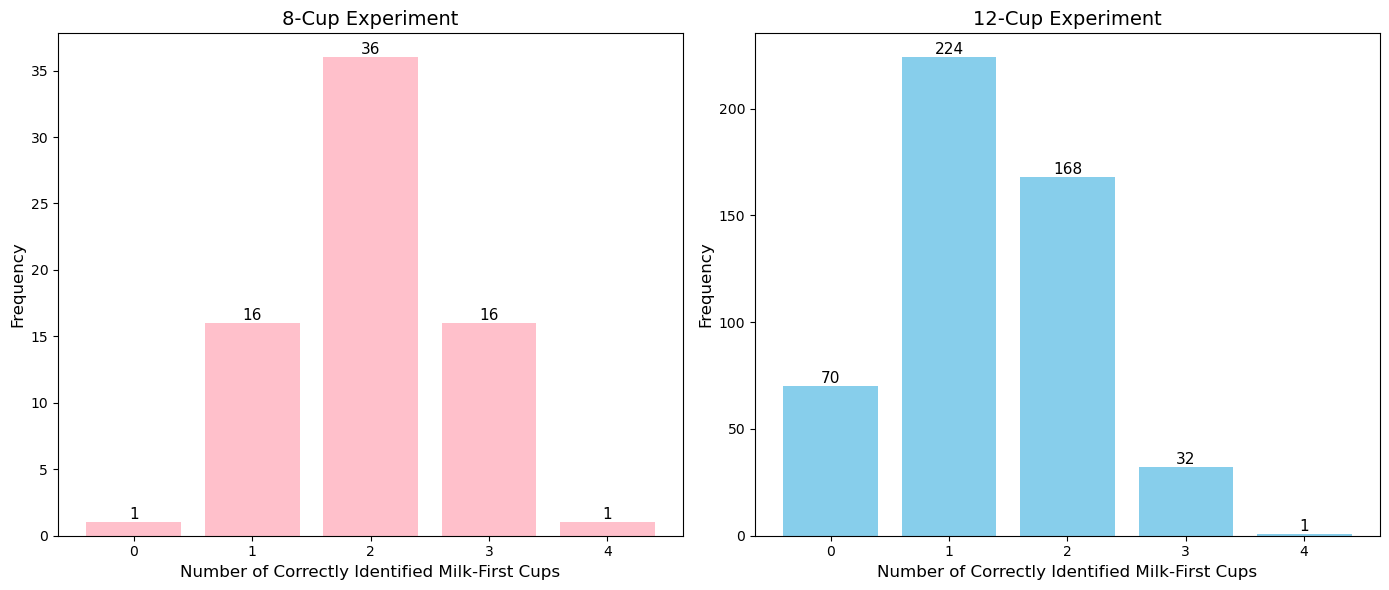

In [2697]:
# Plotting histograms for 8-cup and 12-cup experiments
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14,6))  

# --- 8-cup histogram ---
bars_8 = axs[0].bar(counts_8[0], counts_8[1], color='pink')
axs[0].set_xlabel('Number of Correctly Identified Milk-First Cups', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].set_title('8-Cup Experiment', fontsize=14)

for bar in bars_8:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2,
                height,
                str(int(height)),
                ha='center', va='bottom', fontsize=11)
    # print(bar.get_height())

# --- 12-cup histogram ---
bars_12 = axs[1].bar(counts_12[0], counts_12[1], color='skyblue')
axs[1].set_xlabel('Number of Correctly Identified Milk-First Cups', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].set_title('12-Cup Experiment', fontsize=14)

for bar in bars_12:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2,
                height,
                str(int(height)),
                ha='center', va='bottom', fontsize=11)
    # print(bar.get_height())

plt.tight_layout()
plt.show()


#### **Results**

To calculate the probabilities of correctly identifying at least k milk-first cups, a function is defined below. This function is applied to both the 8-cup and 12-cup experiments to compute the probability (p-value) for all possible numbers of correct selections across all combinations.

In [2698]:
# Function to compute cumulative probabilities
def cumulative_probabilities(counts, total_combinations):
    """
    Computes probabilities of selecting at least k cups correctly.
    Returns a dictionary: keys = 'at_least_k', values = probability.
    """
    milk_first = len(counts) - 1
    probs = {}
    for k in range(milk_first + 1):
        probs[f"at_least_{k}"] = sum(counts[k:]) / total_combinations
    return probs


In [2699]:
# Cumulative probabilities for 12-cup experiment
probs_12 = cumulative_probabilities(counts_12[1], total_combinations_12)

# Print
for k, p in probs_12.items():
    print(f"Probability of {k.replace('_', ' ')} cups correct: {p:.5f}")


Probability of at least 0 cups correct: 1.00000
Probability of at least 1 cups correct: 0.85859
Probability of at least 2 cups correct: 0.40606
Probability of at least 3 cups correct: 0.06667
Probability of at least 4 cups correct: 0.00202


In [2700]:
# Cumulative probabilities for 8-cup experiment
probs_8 = cumulative_probabilities(counts_8[1], total_combinations_8)

# Print 
for k, p in probs_8.items():
    print(f"Probability of {k.replace('_', ' ')} cups correct: {p:.5f}")

Probability of at least 0 cups correct: 1.00000
Probability of at least 1 cups correct: 0.98571
Probability of at least 2 cups correct: 0.75714
Probability of at least 3 cups correct: 0.24286
Probability of at least 4 cups correct: 0.01429


**Probability Results and Percentages**

| At least k cups correct | 8-Cup Experiment (Prob) | 12-Cup Experiment (Prob) | 8-Cup Experiment (%) | 12-Cup Experiment (%) |
| ----------------------- | ----------------------- | ------------------------ | -------------------- | --------------------- |
| 0                       | 1.00000                 | 1.00000                  | 100.00               | 100.00                |
| 1                       | 0.98571                 | 0.85859                  | 98.57                | 85.86                 |
| 2                       | 0.75714                 | 0.40606                  | 75.71                | 40.61                 |
| 3                       | 0.24286                 | 0.06667                  | 24.29                | 6.67                  |
| 4                       | 0.01429                 | 0.00202                  | 1.43                 | 0.20                  |


**Discussion**

Based on the simulation results, the probability of correctly identifying all four milk-first cups by chance is very low: approximately 0.2% in the 12-cup experiment and 1.4% in the 8-cup experiment. For identifying three cups correctly, the probability rises to 6.7% in the 12-cup experiment and 24.3% in the 8-cup experiment. In both experiments, there is a 100% probability of identifying at least zero cups correctly. There is an inverse relationship between the number of cups guessed correctly and the corresponding probability. The low probability for correctly identifying all four cups in the 12-cup experiment indicates that it is highly unlikely this outcome occurred by chance. Therefore, using a 95% confidence level (α = 0.05), the null hypothesis would be rejected.

However, in the 8-cup experiment, the probability of guessing correctly is considerably higher, highlighting the impact of a smaller sample size, as observed when comparing the total number of possible combinations between the 8- and 12-cup experiments. Consequently, a stricter significance threshold may be warranted for smaller experiments to reduce the likelihood of a Type I error.

### *This demonstrates that both the size of the sample and the variability of the outcomes are important factors in interpreting probabilities and setting confidence threshold as discussed by [Raluca]*. [Pennstate stats](https://online.stat.psu.edu/stat200/lesson/4/4.7) reports that standard error decreases with increasing sample size and the confidence interval becomes narrow.

This demonstrates that both the size of the sample and the variability of the outcomes are important factors in interpreting probabilities and setting confidence threshold. Another useful implementation of Fisher's experiment can be found in this [medium article](https://medium.com/random-noise/fishers-exact-test-explained-implementation-in-python-4f186c7e44f6)



## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
Plot histograms of both sets of values on the same axes with transparency.
Describe the differences you see.
Explain how you expect these differences to change if the sample size is increased.



##### Generating a Random Normal Distribution with [Numpy random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). Further explanation is available at [Real python](https://realpython.com/numpy-random-normal/) 


100,000 samples of size 10  was generated using numpy.random.normal, which produces values from a normal distribution centered around a specified mean (loc) and spread according to a specified standard deviation (scale). Size determines the number of values or the shape of the output array.  The default syntax is:

$$numpy.random.normal(loc=0.0, scale=1.0, size=None)$$




In [2701]:
numbers = 100_000
sample_size = 10

In [2702]:
# random.normal(loc=0.0, scale=1.0, size=None) default
samples = np.random.normal( loc=0.0, scale=1.0, size=(numbers, sample_size))

# Show
samples

array([[-1.81318502,  0.05105964, -0.22148451, ...,  0.52483894,
         0.28250384, -0.37793607],
       [ 0.25769801, -0.32493853,  0.72574801, ...,  1.11495274,
         0.04186985, -0.66934699],
       [-0.38335364, -1.58244744,  0.15174056, ...,  0.76778629,
        -0.51669357, -0.77496074],
       ...,
       [ 1.23247505, -0.5705323 ,  0.28105144, ..., -0.20284388,
        -2.35493825,  0.05860924],
       [ 2.28690387,  0.87915873,  0.30806947, ...,  2.6544207 ,
         1.2612845 ,  0.22444604],
       [-0.36552986, -1.07066022,  1.34588119, ..., -0.57436524,
         1.41482527, -0.19432738]], shape=(100000, 10))

In [2703]:
sample_means =np.mean(samples, axis=1)

# show
sample_means

array([-0.25881816,  0.04953595, -0.02058174, ..., -0.26045463,
        0.87852626,  0.29196   ], shape=(100000,))

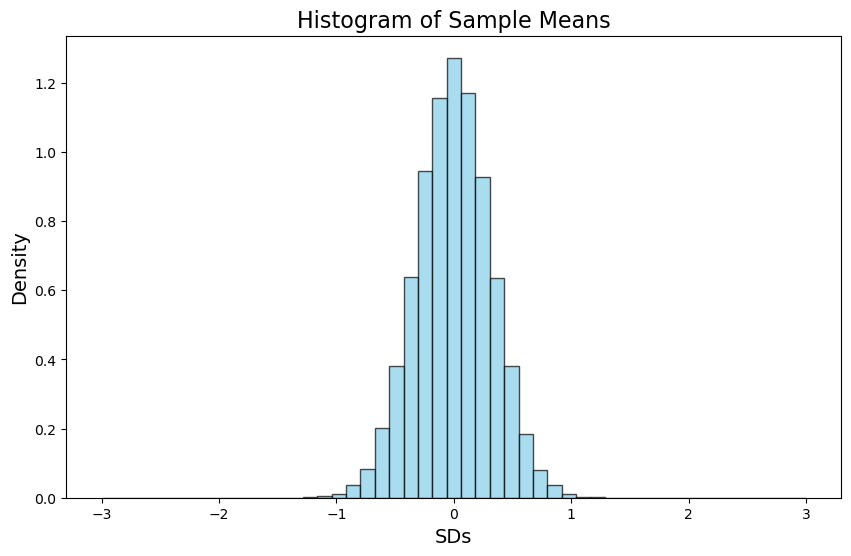

In [2704]:
# Creating a histogram of the sample means
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_means, color='skyblue', edgecolor='black', alpha=0.7, density=True, bins=np.linspace(-3, 3, 50))
ax.set_title('Histogram of Sample Means', fontsize=16)
ax.set_xlabel('SDs', fontsize=14)
ax.set_ylabel('Density', fontsize=14)


plt.show()

Additionally, plotting the distribution of sample means with an overlaid normal curve demonstrates the Central Limit Theorem, showing that the sample means approximate a normal distribution even for relatively small sample sizes. 

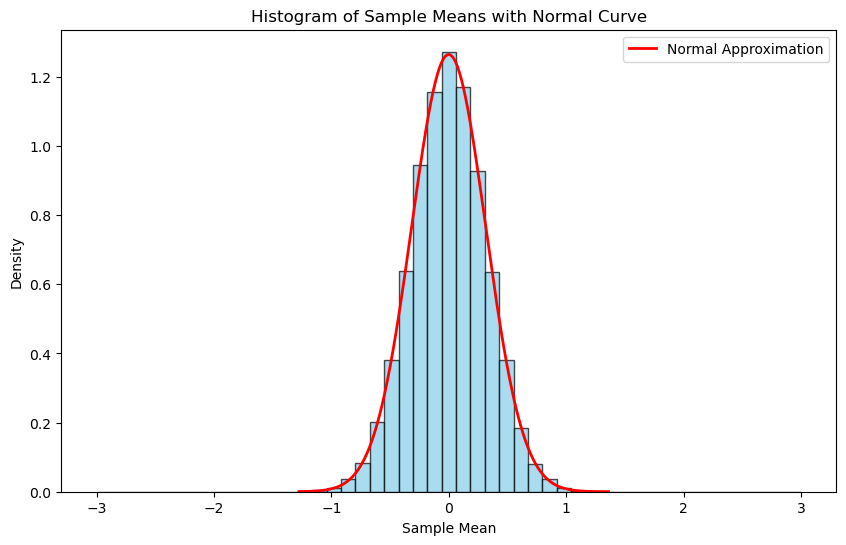

In [2705]:
# Creating a histogram of the sample means
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_means, color='skyblue', edgecolor='black', alpha=0.7, density=True, bins=np.linspace(-3, 3, 50))

# Compute mean and SD of the sample means
mean = sample_means.mean()
std = sample_means.std()

# X values for overlay line
x = np.linspace(sample_means.min(), sample_means.max(), 500)

# Overlay normal curve
ax.plot(x, stats.norm.pdf(x, mean, std), 'r-', linewidth=2,
        label='Normal Approximation')

ax.set_title('Histogram of Sample Means with Normal Curve')
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Density')
ax.legend()

plt.show()

####

From this dataset, 100,000 samples of size 10 were drawn, and for each sample, the sample standard deviation (ddof=1) and the population standard deviation (ddof=0) were calculated.  ddof
ddof means degree of freedom ddof=1 is used for calculating the sample standard devaition while ddof=0 is used to calculate the population standard deviation as described by [tidystat](https://tidystat.com/when-to-use-ddof1-in-np-std/) and in the official [numpy.std](https://numpy.org/devdocs/reference/generated/numpy.std.html) documentation.

In [2706]:
# Computing the standard deviations using numPy std function
sample_SD = samples.std(axis=1, ddof=1)  # sample SD
population_SD = samples.std(axis=1, ddof=0)  # population SD

# Print
print("First 5 of the Sample Standard Deviations:", sample_SD[:5])
print("First 5 of the Population Standard Deviations:", population_SD[:5])

First 5 of the Sample Standard Deviations: [0.83054311 0.84996337 0.87687531 1.05849269 0.64449099]
First 5 of the Population Standard Deviations: [0.78792238 0.80634605 0.83187696 1.00417434 0.61141784]


#### Comparing the sample SD with the population SD

Comparing the resulting histograms shows that using ddof=0 slightly underestimates the true population variability, while ddof=1 corrects for this bias through Bessel’s correction, accounting for the loss of one degree of freedom when estimating the mean. As the sample size increases, the standard error decreases, and the distributions of both SDs and sample means become narrower, producing more accurate and reliable estimates of the population parameters.

From the few results printed out, the population standardd deviation is slightly lower than the sample standard deviation. PLotting of a histogram is utilized below to see how this spans across the samples

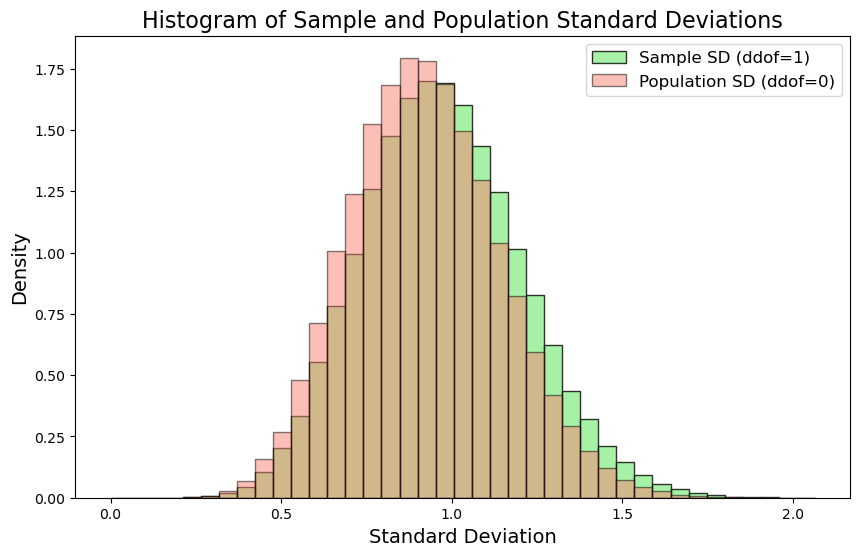

In [2707]:
# Define consistent bins for both histograms
bins = np.linspace(0, max(sample_SD.max(), population_SD.max()), 40)

# Plotting the histogram of both sample and population standard deviations
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_SD, color='lightgreen', edgecolor='black', alpha=0.8, density=True,  bins=bins, label='Sample SD (ddof=1)')

ax.hist(population_SD, color='salmon', edgecolor='black', alpha=0.5, density=True, bins=bins, label='Population SD (ddof=0)')

ax.set_title('Histogram of Sample and Population Standard Deviations', fontsize=16)
ax.set_xlabel('Standard Deviation', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(fontsize=12)

plt.show()


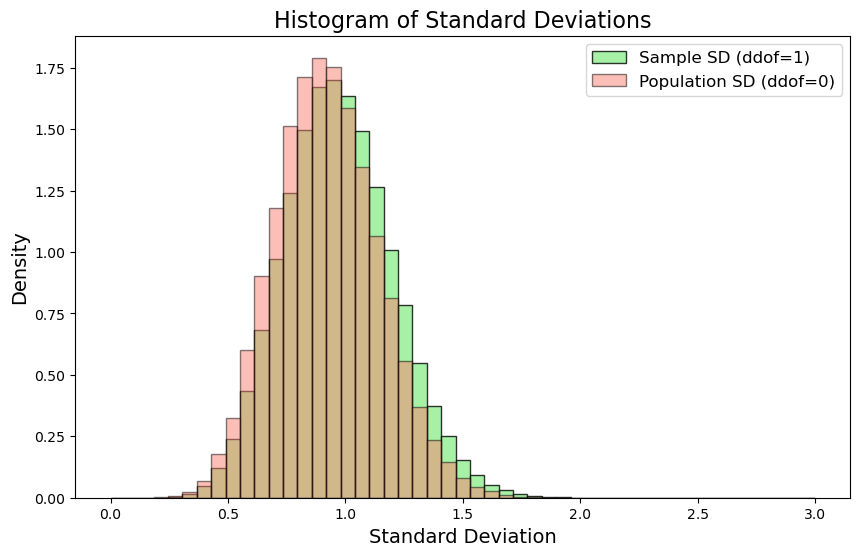

In [2708]:
# Plotting the histogram of both sample and population standard deviations
fig, ax = plt.subplots(figsize=(10, 6))   
ax.hist(sample_SD, color='lightgreen', edgecolor='black', alpha=0.8, density=True, bins=np.linspace(0, 3, 50), label='Sample SD (ddof=1)')
ax.hist(population_SD, color='salmon', edgecolor='black', alpha=0.5, density=True, bins=np.linspace(0, 3, 50), label='Population SD (ddof=0)')
ax.set_title('Histogram of Standard Deviations', fontsize=16)               
ax.set_xlabel('Standard Deviation', fontsize=14)
ax.set_ylabel('Density', fontsize=14)   
ax.legend(fontsize=12)
plt.show()
    

From the histogram, the population standard deviation (ddof = 0) is slightly left-shifted compared to the sample standard deviation (ddof = 1), indicating a systematic underestimation of the true population variability. This bias arises because when ddof = 0 is used, the variance is calculated by dividing by N, even though the population mean is unknown and is estimated from the same sample.

In contrast, using ddof = 1 divides by N − 1, which corrects this downward bias. This correction is known as Bessel’s correction. [Bessel’s correction](https://teflpedia.com/Bessel%E2%80%99s_correction#:~:text=Bessel's%20correction%20is%20crucial%20in,by%20estimating%20the%20sample%20mean.)  ensures an unbiased estimate of the population variance by adjusting for the loss of one degree of freedom introduced when the sample mean is used in place of the true population mean.

The difference between the two estimators is most noticeable for small sample sizes (here, n = 10), where the loss of one degree of freedom has a measurable impact. As the sample size increases, the difference between dividing by N and N − 1 becomes negligible, and both estimators converge to the true population standard deviation.

### sampling distribution
impact of incresing sample size on the sample sd and population sd

In [2709]:
numbers = 10_000_000
sample_size = 100_000

In [2710]:
sample_means =np.mean(samples, axis=1)

# show
sample_means

array([-0.25881816,  0.04953595, -0.02058174, ..., -0.26045463,
        0.87852626,  0.29196   ], shape=(100000,))

In [2711]:
# Computing the standard deviations using numPy std function
sample_SD = samples.std(axis=1, ddof=1)  # sample SD
population_SD = samples.std(axis=1, ddof=0)  # population SD

# Print
print("First 5 of the Sample Standard Deviations:", sample_SD[:5])
print("First 5 of the Population Standard Deviations:", population_SD[:5])

First 5 of the Sample Standard Deviations: [0.83054311 0.84996337 0.87687531 1.05849269 0.64449099]
First 5 of the Population Standard Deviations: [0.78792238 0.80634605 0.83187696 1.00417434 0.61141784]


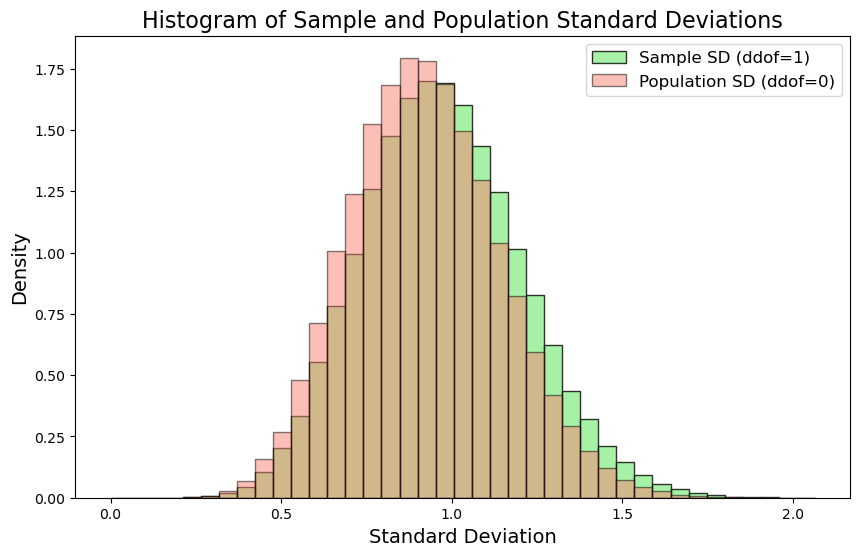

In [2712]:
# Define consistent bins for both histograms
bins = np.linspace(0, max(sample_SD.max(), population_SD.max()), 40)

# Plotting the histogram of both sample and population standard deviations
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sample_SD, color='lightgreen', edgecolor='black', alpha=0.8, density=True,  bins=bins, label='Sample SD (ddof=1)')

ax.hist(population_SD, color='salmon', edgecolor='black', alpha=0.5, density=True, bins=bins, label='Population SD (ddof=0)')

ax.set_title('Histogram of Sample and Population Standard Deviations', fontsize=16)
ax.set_xlabel('Standard Deviation', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(fontsize=12)

plt.show()


### Ref

- https://numpy.org/devdocs/reference/generated/numpy.std.html
- https://www.youtube.com/watch?v=sHRBg6BhKjI

- https://www.youtube.com/watch?v=SzZ6GpcfoQY


## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.



The normal distribution is a continuous probability distribution characterised by a bell shaped curve. It is symmetric in shape, with the mean determining the location of the distribution and the standard deviation determining its spread [Statology](https://www.statology.org/normal-distribution-vs-standard-normal-distribution/). 

The standard normal distribution is a specific case of the normal distribution with a mean of zero and a standard deviation of one.

In this study, the two sample groups used in the independent samples t test are denoted as Group A and Group B. Group A is drawn from the standard normal distribution, while Group B is drawn from a normal distribution with a mean difference d and a standard deviation of one.

In [2713]:
alpha = 0.05 # significance level
size = 100 # sample size
simulations = 1000 # number of simulations
ds = np.arange(0, 1.01, 0.1) # mean differences to simulate

# show
ds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [2714]:
# Function to simulate t tests and calculate Type II error rates
def simulate_t_test_for_d(d, alpha=0.05):
    not_rejected = 0

    for _ in range(simulations):
        # Group A: standard normal
        group_a = np.random.normal(loc=0.0, scale=1.0, size=size)

        # Group B: normal with mean d
        group_b = np.random.normal(loc=d, scale=1.0, size=size)

        # Independent samples t test
        _, p_value = stats.ttest_ind(group_a, group_b)

        # Fail to reject H0
        if p_value >= alpha:
            not_rejected += 1

    # Type II error rate
    return not_rejected / simulations


In [2715]:
type_ii_error_rates = []

for d in ds:
    rate = simulate_t_test_for_d(d, alpha)
    type_ii_error_rates.append(rate)
    print(f"d = {d:.1f}, Type II error rate = {rate:.3f}")


d = 0.0, Type II error rate = 0.946
d = 0.1, Type II error rate = 0.895
d = 0.2, Type II error rate = 0.710
d = 0.3, Type II error rate = 0.456
d = 0.4, Type II error rate = 0.204
d = 0.5, Type II error rate = 0.051
d = 0.6, Type II error rate = 0.013
d = 0.7, Type II error rate = 0.001
d = 0.8, Type II error rate = 0.000
d = 0.9, Type II error rate = 0.000
d = 1.0, Type II error rate = 0.000


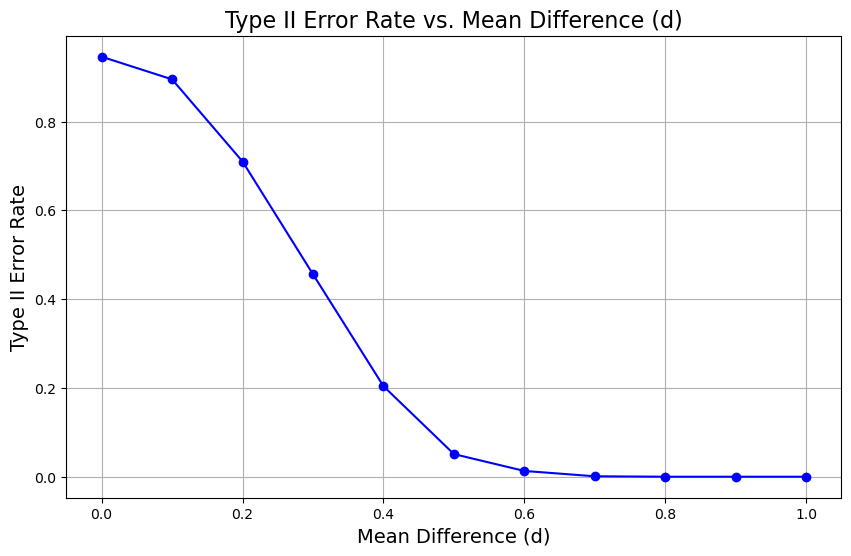

In [2716]:
# plotting the type 2 error rates
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ds, type_ii_error_rates, marker='o', linestyle='-', color='blue')
ax.set_title('Type II Error Rate vs. Mean Difference (d)', fontsize=16)
ax.set_xlabel('Mean Difference (d)', fontsize=14)
ax.set_ylabel('Type II Error Rate', fontsize=14)
ax.grid(True)
plt.show()  


There is an inverse relationship between the mean difference (d) and the Type II error rate. As the mean difference increases, the Type II error rate decreases. This indicates that larger differences between group means make it easier to detect a true effect, thereby reducing the likelihood of failing to reject the null hypothesis when it is false.

Problem 4: ANOVA
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

Perform a one-way ANOVA to test whether all three means are equal.
Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
Compare the conclusions.
Write a short note on why ANOVA is preferred over running several t-tests.

In [2717]:
# Generating the samples for ANOVA and t tests
group_a = np.random.normal(0.0, 1.0, 30)
group_b = np.random.normal(0.5, 1.0, 30)
group_c = np.random.normal(1.0, 1.0, 30)

In [2718]:
# Create a dataframe
df_wide = pd.DataFrame({'Group_A': group_a, 'Group_B': group_b, 'Group_C': group_c})

# Show
df_wide.head()

,Group_A,Group_B,Group_C
0,0.527527,-0.227934,2.061118
1,0.319050,-0.858179,0.444380
2,-0.170452,1.642748,1.660796
3,-0.052416,0.212491,1.416732
4,1.297505,2.003796,2.356255


In [2719]:
# Descriptive statistics
df_wide.describe()

,Group_A,Group_B,Group_C
count,30.000000,30.000000,30.000000
mean,0.256182,0.290272,0.885210
std,1.005021,1.071516,1.042774
min,-1.709800,-2.041494,-1.800640
25%,-0.253773,-0.377319,0.178361
50%,0.214934,0.159712,0.799144
75%,1.190024,0.923395,1.709311
max,1.895662,2.691402,2.511018


The data were reshaped (unpivoted) from wide to long format to ensure that each observation was explicitly associated with a group label, which is required for statistical procedures such as ANOVA and Tukey post hoc testing. The reshaping of data between wide and long formats is described further in [Towards Data Science.](https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad/) and official [Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.melt.html).



In [2720]:
# Rearranging the dataframe from wide to long format
df_long = df_wide.melt(var_name="group", value_name="value")

# Show
df_long.head()

,group,value
0,Group_A,0.527527
1,Group_A,0.319050
2,Group_A,-0.170452
3,Group_A,-0.052416
4,Group_A,1.297505


#### **Boxplot to visualize the groups and their distributions**

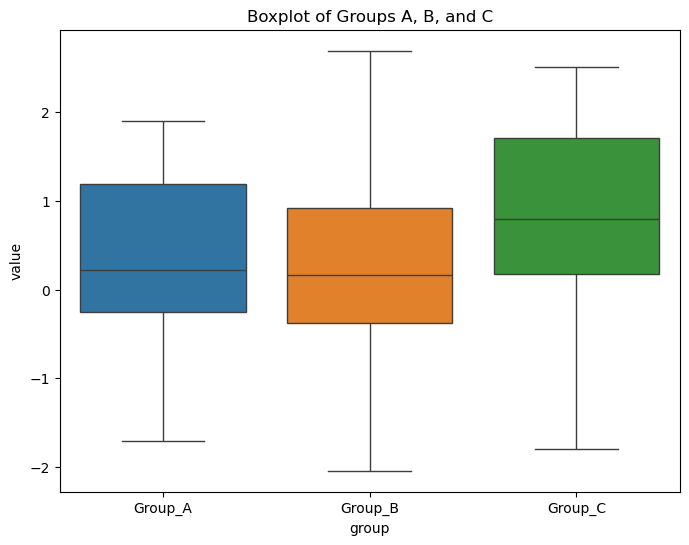

In [2721]:
fig , ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='group', y='value', data=df_long, hue='group', ax=ax)
ax.set_title('Boxplot of Groups A, B, and C')
plt.show()

The steps above were used to create a function that can later be called to generate random data for multiple simulations when performing ANOVA and multiple t tests.

In [2722]:
def generate_groups():
    # Generate long format random normal DataFrame for the three groups.    
    group_a = np.random.normal(0.0, 1.0, 30)
    group_b = np.random.normal(0.5, 1.0, 30)
    group_c = np.random.normal(1.0, 1.0, 30)
    
    # Create wide DataFrame and melt to long format
    df_long = pd.DataFrame({'Group_A': group_a, 'Group_B': group_b,'Group_C': group_c}).melt(var_name='group', value_name='value')
    
    return df_long

In [2723]:
# ANOVA simulation function
def simulate_anova(df_long, alpha=0.05):
    # Pull groups from the long format dataframe
    groups = [df_long[df_long["group"] == g]["value"] for g in df_long["group"].unique()]

    # ANOVA test
    _, p_value = stats.f_oneway(*groups)
    
    return p_value < alpha


In [2724]:
def simulate_pairwise_ttests(df_long, alpha=0.05):
    # pull each unique group from the long format dataframe
    groups = df_long["group"].unique()

    # keep track of rejections
    no_rejections = 0

    # perform pairwise t-tests by iterating over unique group combinations
    for i in range(len(groups)): 
        for j in range(i+1, len(groups)): #
            g1 = df_long[df_long["group"] == groups[i]]["value"]
            g2 = df_long[df_long["group"] == groups[j]]["value"]
            _, p_value = stats.ttest_ind(g1, g2)
            if p_value < alpha:
                no_rejections += 1

    return no_rejections

The function was repeatedly called to simulate random sampling across multiple iterations, and the rejection of the null hypothesis was recorded for both the ANOVA and the multiple pairwise t tests.

In [2725]:
simulations = 1000
anova_rejections = 0
ttest_any_rejections = 0

for _ in range(simulations):
    df_long = generate_groups()
    3
    if simulate_anova(df_long):
        anova_rejections += 1

    if simulate_pairwise_ttests(df_long) > 0:
        ttest_any_rejections += 1

print("ANOVA rejections:", anova_rejections)
print("At least one t test rejection:", ttest_any_rejections)


ANOVA rejections: 950
At least one t test rejection: 977


In [2726]:
percentage_anova_rejections = (anova_rejections / simulations) * 100
percentage_ttest_any_rejections = (ttest_any_rejections / simulations) * 100

print(f"Percentage of ANOVA rejections: {percentage_anova_rejections:.2f}%")
print(f"Percentage of at least one t test rejection: {percentage_ttest_any_rejections:.2f}%")

Percentage of ANOVA rejections: 95.00%
Percentage of at least one t test rejection: 97.70%


From the results, both ANOVA and the pairwise t tests rejected the null hypothesis in the majority of simulations, reflecting the presence of true differences between the group means. The rejection frequency for ANOVA was slightly lower at 93% compared to 98% for the uncorrected pairwise t tests. ANOVA is preferred in this context because it compares three or more groups simultaneously without increasing the probability of a Type I error [(Clyte)](((https://www.clyte.tech/post/when-to-use-t-test-vs-anova?srsltid=AfmBOopBmY0tC6U6pVv5zFI0BANO6dDI_MUJE9YtNDGmelvlOkVKZyfw)). 

Performing multiple t tests inflates the Type I error rate, a phenomenon known as alpha level inflation or familywise error rate (FWER), which is the probability of making at least one Type I error when conducting multiple hypothesis tests [(source)](https://www.statisticshowto.com/familywise-error-rate/).

 One simple way to control this high probability of false positives is by using the single step Bonferroni correction, which adjusts the significance level by dividing the overall alpha by the number of tests and applying this adjusted alpha to each test. 

### Post Hoc Analysis with Tukey HSD

Out of 1,000 simulations, the p-value was below 0.05 in 937 cases, supporting rejection of the null hypothesis. This indicates a significant difference between the group means.

To determine which specific groups differ, a **Tukey HSD (Honestly Significant Difference) test** is performed. Tukey’s HSD compares the means of all possible pairs of groups [(SciPy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html) and helps prevent post hoc fallacies that can arise when multiple pairwise t tests are conducted, even with adjustments. 

Further useful explanations of post hoc testing in Python were found in these [Kaggle](https://www.kaggle.com/code/haseebwar07/hypothesis-testing-and-anova-post-hoc-with-python) and [Medium](https://medium.com/@lomso.dzingwa/exploring-post-hoc-tests-in-statistical-inference-enhancing-anova-analysis-with-python-72ef43747119) articles.


In [2727]:
from scipy.stats import tukey_hsd

tukey_result = tukey_hsd(
    df_long[df_long["group"] == "Group_A"]["value"],
    df_long[df_long["group"] == "Group_B"]["value"],
    df_long[df_long["group"] == "Group_C"]["value"]
)

print(tukey_result)


Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.609     0.076    -1.268     0.050
 (0 - 2)     -1.065     0.001    -1.724    -0.406
 (1 - 0)      0.609     0.076    -0.050     1.268
 (1 - 2)     -0.456     0.231    -1.114     0.203
 (2 - 0)      1.065     0.001     0.406     1.724
 (2 - 1)      0.456     0.231    -0.203     1.114



##### **Mapping Tukey index to groups**

| Index | Group Label | Mean            |
| ----: | ----------- | --------------- |
|     0 | Group A     | 0.0             |
|     1 | Group B     | 0.5             |
|     2 | Group C     | 1.0             |


Interpreted Tukey HSD Results 

Group A vs Group B
No statistically significant difference was detected (p = 0.177), as the confidence interval includes zero.

Group A vs Group C
A statistically significant difference was observed (p < 0.001), with Group C having a higher mean than Group A.

Group B vs Group C
A statistically significant difference was observed (p = 0.037), with Group C having a higher mean than Group B.

From the findings, Group C is significantly different from both Groups A and B,while Groups A and B do not differ significantly. Thherefore, the significant ANOVA result is primarily due to the difference between Group C and the other two groups.

In [2728]:
def simulate_pairwise_ttests(df_long, alpha=0.05):
    # pull each unique group from the long format dataframe
    groups = df_long["group"].unique()

    # keep track of rejections
    no_rejections = 0

    # perform pairwise t-tests by iterating over unique group combinations
    for i in range(len(groups)): 
        for j in range(i+1, len(groups)): #
            g1 = df_long[df_long["group"] == groups[i]]["value"]
            g2 = df_long[df_long["group"] == groups[j]]["value"]
            _, p_value = stats.ttest_ind(g1, g2)
            if p_value < alpha:
                no_rejections += 1

    return no_rejections

In [2729]:
def simulate_pairwise_ttests_bonferroni(df_long, alpha=0.05):
    # unique group labels
    groups = df_long["group"].unique()
    
    # number of pairwise tests = k choose 2
    m = len(groups) * (len(groups) - 1) // 2
    
    # Bonferroni-adjusted alpha
    alpha_adj = alpha / m

    no_rejections = 0

    # pairwise comparisons
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            g1 = df_long[df_long["group"] == groups[i]]["value"]
            g2 = df_long[df_long["group"] == groups[j]]["value"]

            _, p_value = stats.ttest_ind(g1, g2)

            if p_value < alpha_adj:
                no_rejections += 1

    return no_rejections


In [2730]:
# Applying Bonferroni correction to pairwise t-tests
def simulate_pairwise_ttests_bonferroni(df_long, alpha=0.05):

     # unique groups
    groups = df_long["group"].unique()

    # possible pairwise tests
    m = len(groups) * (len(groups) - 1) // 2

    # Bonferroni correction for 3 tests
    alpha_adj = alpha / m

    no_rejections = 0

    # pairwise comparisons
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            g1 = df_long[df_long["group"] == groups[i]]["value"]
            g2 = df_long[df_long["group"] == groups[j]]["value"]

            _, p_value = stats.ttest_ind(g1, g2)

            if p_value < alpha_adj:
                no_rejections += 1

    return no_rejections


In [2731]:
simulations = 1000
anova_rejections = 0
ttest_any_rejections = 0
ttest_any_bonferroni_rejections = 0

for _ in range(simulations):
    df_long = generate_groups()

    if simulate_anova(df_long):
        anova_rejections += 1

    if simulate_pairwise_ttests(df_long) > 0:
        ttest_any_rejections += 1

    if simulate_pairwise_ttests_bonferroni(df_long) > 0:
        ttest_any_bonferroni_rejections += 1

print("ANOVA rejections:", anova_rejections)
print("At least one t test rejection:", ttest_any_rejections)
print("At least one Bonferroni corrected t test rejection:", ttest_any_bonferroni_rejections)


ANOVA rejections: 938
At least one t test rejection: 976
At least one Bonferroni corrected t test rejection: 930


In [2732]:

# Percentage calculations
percentage_anova_rejections = (anova_rejections / simulations) * 100
percentage_ttest_any_rejections = (ttest_any_rejections / simulations) * 100
percentage_ttest_any_bonferroni_rejections = (ttest_any_bonferroni_rejections / simulations) * 100

# Print percentages
print(f"Percentage of ANOVA rejections: {percentage_anova_rejections:.2f}%")
print(f"Percentage of at least one t test rejection: {percentage_ttest_any_rejections:.2f}%")
print(f"Percentage of at least one Bonferroni corrected t test rejection: {percentage_ttest_any_bonferroni_rejections:.2f}%")


Percentage of ANOVA rejections: 93.80%
Percentage of at least one t test rejection: 97.60%
Percentage of at least one Bonferroni corrected t test rejection: 93.00%


Applying the Bonferroni correction reduced the t test rejection rate to approximately 94%, which is very close to the ANOVA rejection rate of 93%, demonstrating the effectiveness of the correction.

##### Note
This notebook was created with the help of [GitHub Copilot](https://github.com/features/copilot).

###### Aditional references

bar labels - [matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html)